# Introducción al preprocesamiento

Se trata de un proceso que tiene como finalidad transformar los datos brutos en datos más fáciles de utilizar (o directamente utilizables).



Es crucial contar con un volumen de datos aceptable, ya que los algoritmos de machine learning sólo extraen patrones de los datos existentes. Si no contamos con suficientes datos, no puede existir aprendizaje.

Sin embargo, pueden darse situaciones en las que contemos con una cantidad de datos aceptable, pero esos datos terminen resultando inservibles por estar sesgados.
Se dice de un dataset o conjunto de datos que está sesgado si no representa de forma equitativa todos los tipos de muestras que podamos aplicar al problema. 
> Siguiendo el ejemplo de la última sesión, el robot que distingue manzanas de plátanos no sería capaz de identificar una naranja si no le damos datos sobre naranjas.

Han llegado a ocurrir auténticas catástrofes por utilizar conjuntos de datos sesgados, como el escándalo de Google Photos en 2015: 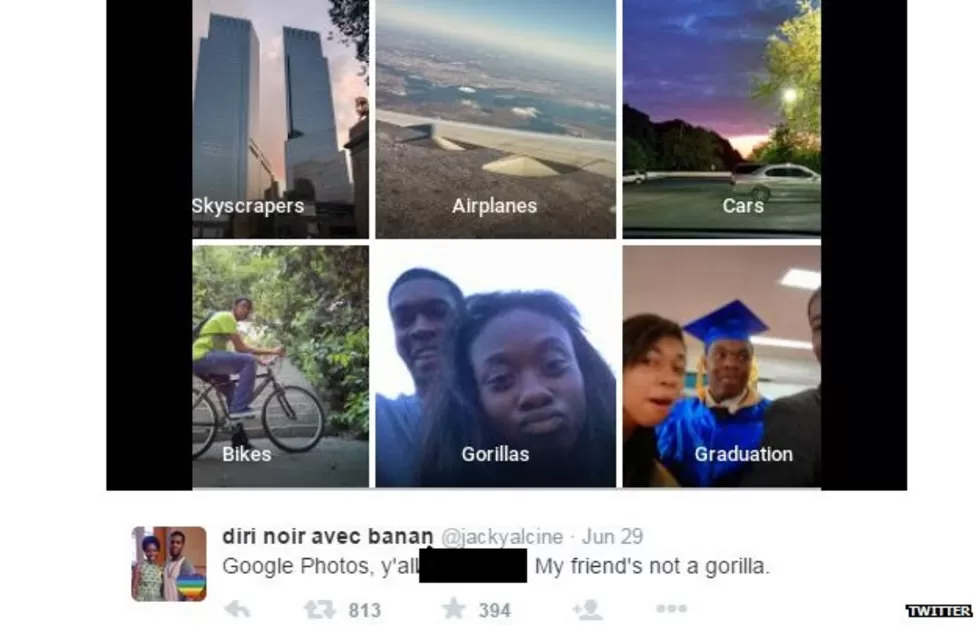

Fuente: https://www.bbc.com/news/technology-33347866


En resumen, los datos deben ser:


*   **Suficientes**: con 100 muestras no vamos a conseguir aprender
*   **No-sesgados**: representan por igual todas las muestras posibles
*   **De calidad**: deben tener un formato común y ser tratables, sin "mal olor"
*   **Relevantes**: no podemos darle a un sistema de recomendación de canciones la distancia del usuario a un supermercado, por ejemplo
*   **Representativos**: suficientemente característicos

## Tipos de datos

Se suele hacer distinción entre datos estructurados y no estructurados.



*   Dato estructurado: aquel cuyo significado intrínseco se puede entender a primera vista (número de pulsaciones por minuto, una distancia, una categoría...)
*   Dato no estructurado: una imagen, sonido...


Vamos a trabajar exclusivamente con **datos estructurados**, que pueden ser continuos (numéricos, con x ∈ ℜ) o discretos/categóricos, con valores concretos dentro de un conjunto acotado (apto/no apto, alto/bajo/medio...).

Almacenaremos los datos en tablas como esta (dataframes) para dárselos de comer a los algoritmos:

| Streamer | Estado actual | Ingresos anuales (€) |
| :------: | :------: | :------: |
| Auronplay | Cancelado | 13000000 |
| Ibai | No cancelado | 21000000 |
| Elxokas | Cancelado | 7000000 |
| Biyin | Cancelado | 17000000 |


In [1]:
import numpy as np

X = np.array([['Auronplay',  'Cancelado'],
              ['Ibai',       'No cancelado'],
              ['Elxokas',    'Cancelado'],
              ['Biyin',      'Cancelado']])
print(X)

[['Auronplay' 'Cancelado']
 ['Ibai' 'No cancelado']
 ['Elxokas' 'Cancelado']
 ['Biyin' 'Cancelado']]


Vamos a tratar dos tipos de datos estructurados: **continuos y discretos**

# Preprocesamiento de datos continuos

Entendemos por datos continuos a aquellos datos numéricos que pueden tomar cualquier valor real (ℜ) en un rango preestablecido. Pueden ser la estatura de una persona, una distancia, temperatura...<br></br>

Es el tipo de datos más habitual, pero su principal problema es que no suelen tener una escala homogénea, por lo que se suelen realizar transformaciones sobre ellos para acotarlos a un rango de valores más tratable para compararlos. Esto requiere analizarlos para conocer cómo se comportan.<br></br>

Pueden darse varios casos:

Distribución normal con media $\mu$ y desviación típica $\sigma$:

/var/folders/nq/192typw95wxcbpc296njlyy00000gn/T/ipykernel_23207/3570090901.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<Axes: ylabel='Density'>

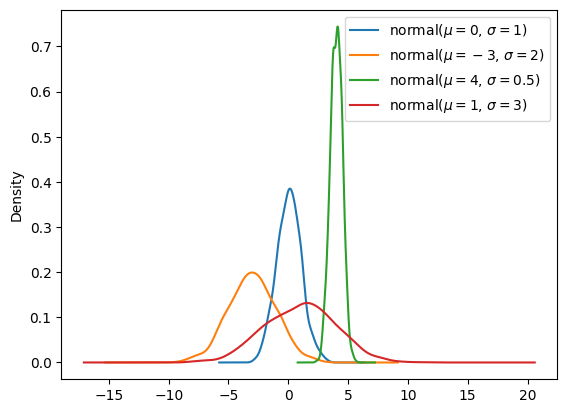

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

normal_df = pd.DataFrame()

normal_df[r'normal($\mu=0$, $\sigma=1$)'] = np.random.normal(0, 1, 1000)
normal_df[r'normal($\mu=-3$, $\sigma=2$)'] = np.random.normal(-3, 2, 1000)
normal_df[r'normal($\mu=4$, $\sigma=0.5$)'] = np.random.normal(4, 0.5, 1000)
normal_df[r'normal($\mu=1$, $\sigma=3$)'] = np.random.normal(1, 3, 1000)

normal_df.plot.kde()

Distribución beta:

<Axes: ylabel='Density'>

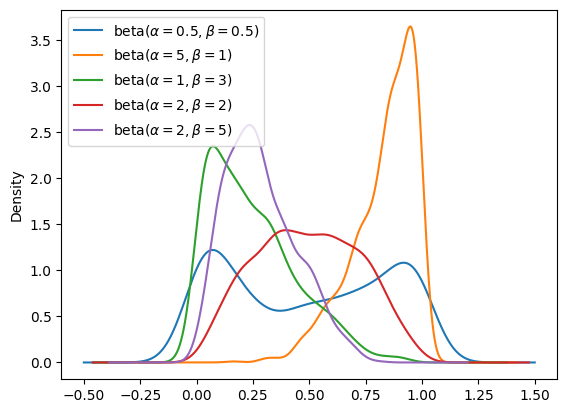

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

beta_df = pd.DataFrame()

beta_df[r'beta($\alpha=0.5, \beta=0.5$)'] = np.random.beta(0.5, 0.5, 1000)
beta_df[r'beta($\alpha=5, \beta=1$)'] = np.random.beta(5, 1, 1000)
beta_df[r'beta($\alpha=1, \beta=3$)'] = np.random.beta(1, 3, 1000)
beta_df[r'beta($\alpha=2, \beta=2$)'] = np.random.beta(2, 2, 1000)
beta_df[r'beta($\alpha=2, \beta=5$)'] = np.random.beta(2, 5, 1000)

beta_df.plot.kde()

Distribución uniforme:

<Axes: ylabel='Density'>

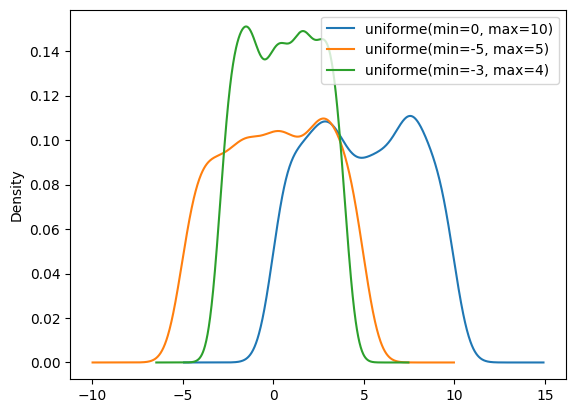

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

uniform_df = pd.DataFrame()

uniform_df[r'uniforme(min=0, max=10)'] = np.random.uniform(0, 10, 1000)
uniform_df[r'uniforme(min=-5, max=5)'] = np.random.uniform(-5, 5, 1000)
uniform_df[r'uniforme(min=-3, max=4)'] = np.random.uniform(-3, 4, 1000)

uniform_df.plot.kde()

Vamos a realizar una serie de transformaciones sobre estas distribuciones empleando el módulo [`preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) de `sklearn`.

## StandardScaler

Sirve para aproximar cualquier conjunto de datos que siga una distribución normal a una normal con media 0 y desviación típica 1:

$x^\prime_i = \frac{x_i - \mu}{\sigma}$

Donde $x_i$ es el dato que queremos estandarizar, $\mu$ es el valor medio de todos los datos y $\sigma$ es la desviación típica de todos los datos.

Veamos un ejemplo:

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

print("Media: ", X.mean(axis=0))
print("Desviación típica: ", X.std(axis=0))

Media:  [1.         0.         0.33333333]
Desviación típica:  [0.81649658 0.81649658 1.24721913]


In [6]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

print("Media: ", X_scaled.mean(axis=0))
print("Desviación típica: ", X_scaled.std(axis=0))

Media:  [0. 0. 0.]
Desviación típica:  [1. 1. 1.]


Veamos cómo se comportan las distribuciones uniformes al aplicarles StandardScaler:

<Axes: title={'center': 'MinMaxScaler'}, ylabel='Density'>

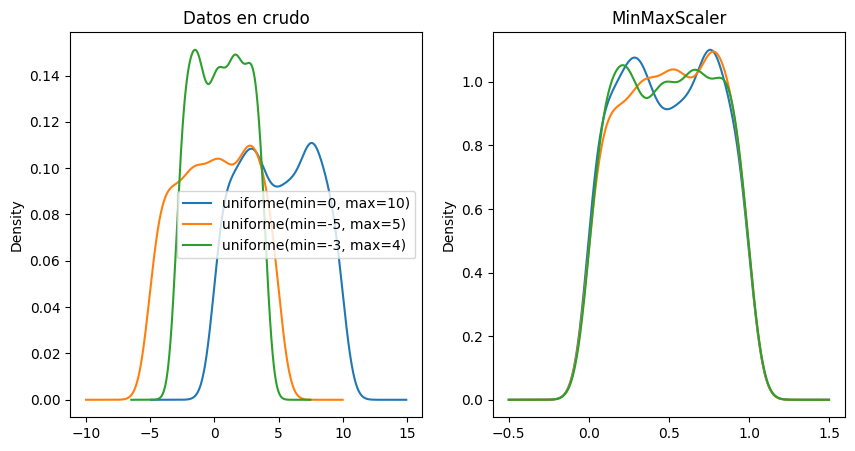

In [7]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

... y las normales:

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

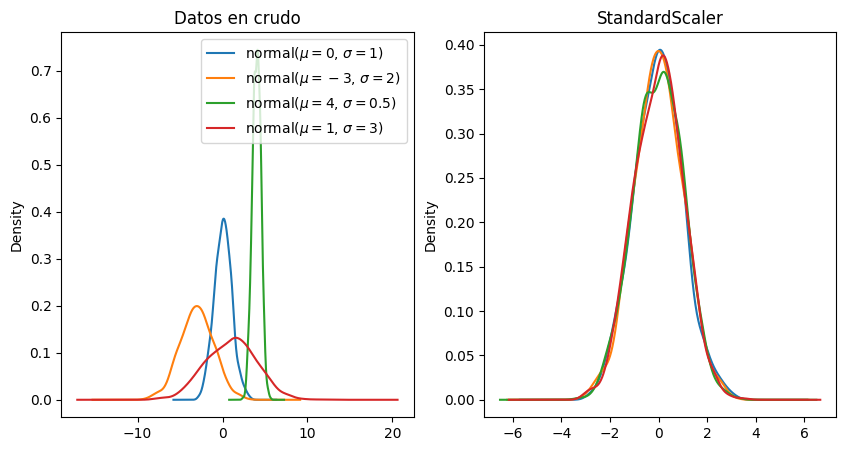

In [8]:
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<Axes: title={'center': 'StandardScaler'}, ylabel='Density'>

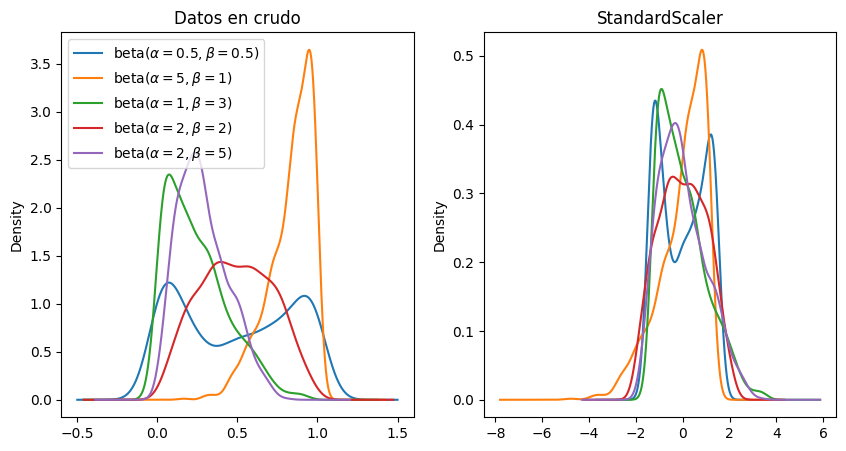

In [9]:
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

## MinMaxScaler

No confundir con estandarización, MinMaxScaler sirve para acotar los datos a un rango definido, generalmente entre 0 y 1. **Es recomendable utilizarlo cuando la desviación típica (std) es baja.**

Vamos a ver cómo se comporta sobre la matriz X definida anteriormente:

In [10]:
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

(Nótese que el valor máximo es 2 y el mínimo positivo es 0)

In [11]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Efectivamente, están todos entre 0 y 1.

Vamos a ver cómo se comportan las distribuciones anteriores al aplicar MinMaxScaler:

<Axes: title={'center': 'MinMaxScaler'}, ylabel='Density'>

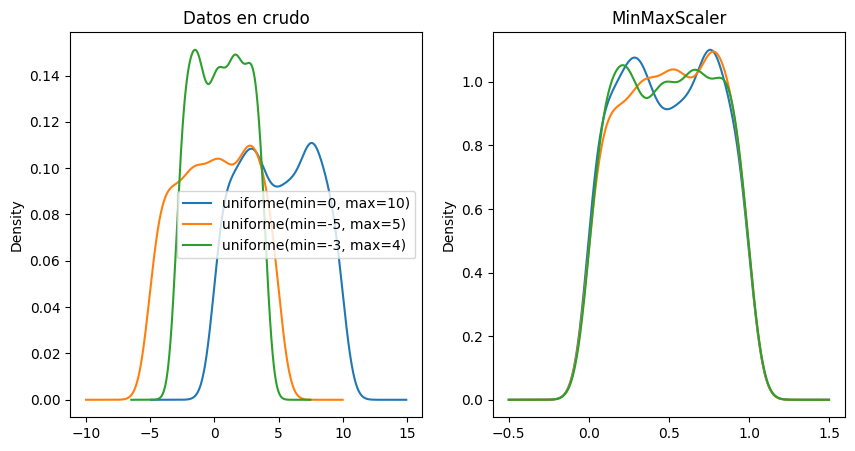

In [12]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<Axes: title={'center': 'MinMaxScaler'}, ylabel='Density'>

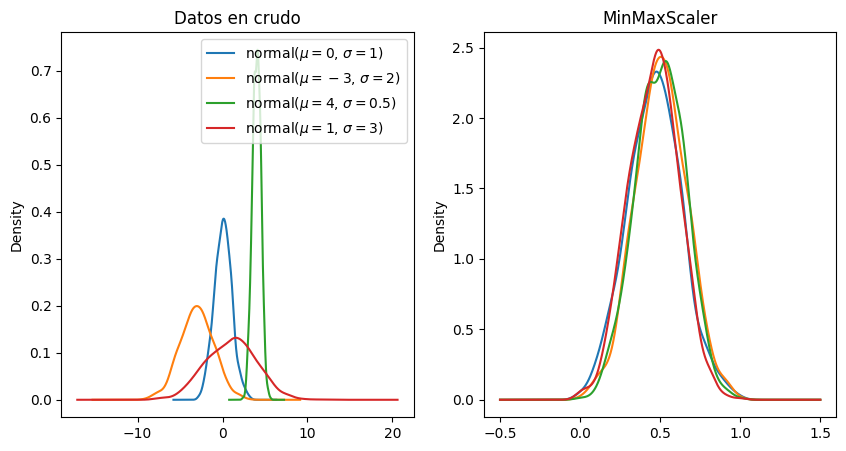

In [13]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<Axes: title={'center': 'MinMaxScaler'}, ylabel='Density'>

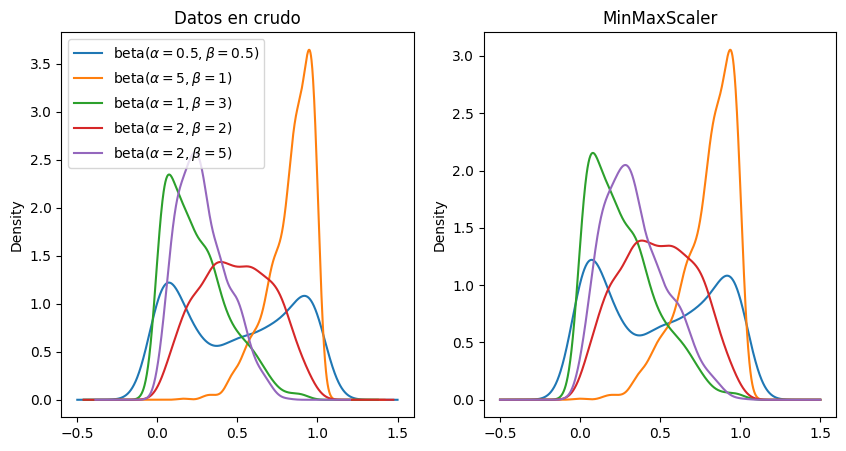

In [14]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

# Preprocesamiento de datos discretos

Recordemos que se trata de datos que toman valores dentro de un conjunto definido (categorías).<br></br>
Pueden tomar valores numéricos o no numéricos, siendo los últimos algo más problemáticos porque los algoritmos de machine learning suelen trabajar con números porque se basan en expresiones matemáticas.<br></br>
Un ejemplo puede ser hombre/mujer pago con tarjeta/efectivo, como conjuntos definidos finitos y la edad de una persona (0, 1, 2, ..., 99... ∞) como conjunto infinito.<br></br>

Para tratar estos datos se suelen convertir a números, bien creando una columna nueva por cada valor posible del atributo (OneHotEncoder) o asignando un número a cada posible valor (OrdinalEncoder).

## OneHotEncoder

Como se ha mencionado, OneHotEncoder crea, para cada valor de un atributo, una columna nueva con valor 0 ó 1. Se suele utilizar con categorías de naturaleza binaria o con muy pocos valores diferentes. Acelera mucho las búsquedas para un único valor de atributo (obtener los ID de todos los hombres, o de personas de categoría X).

Para el ejemplo del inicio:

| Streamer | Estado actual | 
| :------: | :------: |
| Auronplay | Cancelado | 
| Ibai | No cancelado | 
| Elxokas | Cancelado | 
| Biyin | Cancelado |

Obtendríamos:

| Streamer | Cancelado | No cancelado |
| :------: | :------: | :------: |
| Auronplay | 1 | 0 |
| Ibai | 0 | 1 |
| Elxokas | 1 | 0 |
| Biyin | 1 | 0 |

Sería mucho más sencillo realizar una consulta tal que "Obtén los nombres de todos los streamers cancelados".

In [15]:
import numpy as np

X = np.array([['mujer' ],
              ['hombre'],
              ['hombre'],
              ['mujer' ]])

In [16]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder().fit_transform(X).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

## OrdinalEncoder

Similar a OneHotEncoder, pero no separa columnas.
Ejemplo con ciudades:

In [17]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

X = np.array([['madrid' ],
              ['londres'],
              ['madrid'],
              ['paris' ]])

OrdinalEncoder().fit_transform(X)

array([[1.],
       [0.],
       [1.],
       [2.]])

¡OJO! Los elementos se asignan en orden. Véase `londres = 0`, `madrid = 1` y `paris = 2`, lo que da "más peso" a París que a Madrid o Londres.

En un ejemplo como el siguiente es más lógico asignar "pesos", y podemos intentar utilizarlo a nuestro favor:

In [18]:
X = [['deficiente' ],
     ['correcto'],
     ['muy deficiente'],
     ['mejorable' ]]

# Importante, ordenamos las categorías para pasárselas a OrdinalEncoder:
OrdinalEncoder(categories=[['muy deficiente', 'deficiente', 'mejorable', 'correcto']]).fit_transform(X)

array([[1.],
       [3.],
       [0.],
       [2.]])

In [19]:
X = [['deficiente' ],
     ['correcto'],
     ['muy deficiente'],
     ['mejorable' ]]

OrdinalEncoder(categories=[['correcto', 'mejorable', 'deficiente', 'muy deficiente']]).fit_transform(X)

array([[2.],
       [0.],
       [3.],
       [1.]])

Podemos ver que cambia completamente según lo ordenemos.

# Datos atípicos

Es posible que, mientras estemos realizando nuestro análisis exploratorio, alguna variable aleatoria muestre valores que se salen del rango habitual por un amplio margen. Estos valores pueden resultar problemáticos en particular a la hora de entrenar un modelo, pues pueden afectar a su capacidad de generalización.

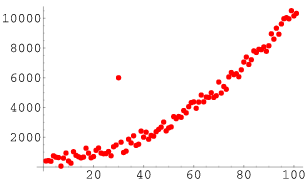

Para detectarlos, lo más sencillo es utilizar un diagrama de bigotes que muestre qué valores se salen del rango intercuartílico.

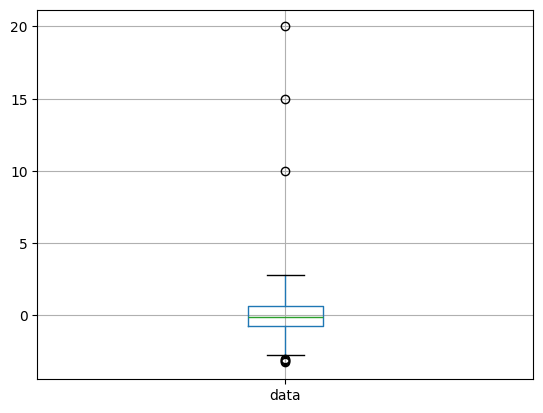

In [20]:
df = pd.DataFrame()
np.random.seed(64)
data = np.concatenate([np.random.normal(0, 1, 1000), np.array([10., 15., 20.])])
df['data'] = data
df.boxplot(column="data")
plt.show()

Cuando nos encontramos con datos anómalos, hay varias formas de tratarlos. Lo más habitual es eliminarlos, pero depende de cada caso; puede que nos interese mantenerlos en ciertas circunstancias. Hay campos y algoritmos de Machine Learning dedicados exclusivamente a la detección de anomalías (por ejemplo, para detectar valores atípicos en una cadena de producción, que puedan sugerir errores).

# Nulos

Por lo general, si hay algún registro a nulo en el dataset, siempre nos interesa tratarlo de alguna forma, ya que es un valor que desconocemos. Hay dos opciones:

- Eliminarlos, que tiene como ventaja el no tener que preocuparse por esos elementos nulos, pero como desventaja el quedarnos con menos registros.
- Reemplazarlos por otro valor que consideremos probable (por ejemplo, la media de la variable).

El enfoque a usar varía dependiendo del problema al que nos enfrentemos. Pandas nos ofrece herramientas para ambas opciones, en la forma de las funciones `pd.DataFrame.fillna()` y `pd.DataFrame.dropna()`. También contamos con la función `pd.DataFrame.isnull()`, que sustituye las celdas nulas por "True", y las demás por "False", útil para ver qué filas exactamente son las que tienen elementos nulos.

In [21]:
data = np.array([
    [1, 2, 3],
    [4, None, 6],
    [None, None, 9]
])
columns = ["a", "b", "c"]
df = pd.DataFrame(data, columns=columns)
df

,a,b,c
0,1,2,3
1,4,None,6
2,None,None,9


In [22]:
df.fillna(0)

/var/folders/nq/192typw95wxcbpc296njlyy00000gn/T/ipykernel_23207/516507702.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0)


,a,b,c
0,1,2,3
1,4,0,6
2,0,0,9


In [23]:
df.dropna()

,a,b,c
0,1,2,3


# Oversampling y undersampling

A veces se puede dar el caso de que necesitemos un número de registros diferente al que tenemos en nuestro dataset. Si queremos recortar nuestro dataset, entonces lo que queremos hacer es **undersampling**; por contra, si queremos ampliarlo, queremos hacer **oversampling**.

El undersampling es lo más sencillo ya que simplemente implica elegir ciertos registros para eliminar. Se puede hacer aleatoriamente, pero hay técnicas algo más sofisticadas. La librería `imblearn` contiene muchas herramientas para realizar undersampling.

In [24]:
def compare_samplings(X, y, X_resampled, y_resampled, undersampling: bool):
    technique = "undersampling" if undersampling is True else "oversampling"
    print(f"tamaño de X antes de hacer {technique}: {len(X)}")
    print(f"tamaño de X después de hacer {technique}: {len(X_resampled)}")
    # contamos el número de registros para cada valor de la clase
    print(np.unique(y_resampled, return_counts=True))
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.title(f'sin {technique}')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='coolwarm', alpha=0.7)
    plt.title(f'con {technique}')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.tight_layout()
    plt.show()

tamaño de X antes de hacer undersampling: 1000
tamaño de X después de hacer undersampling: 406
(array([0, 1]), array([203, 203]))


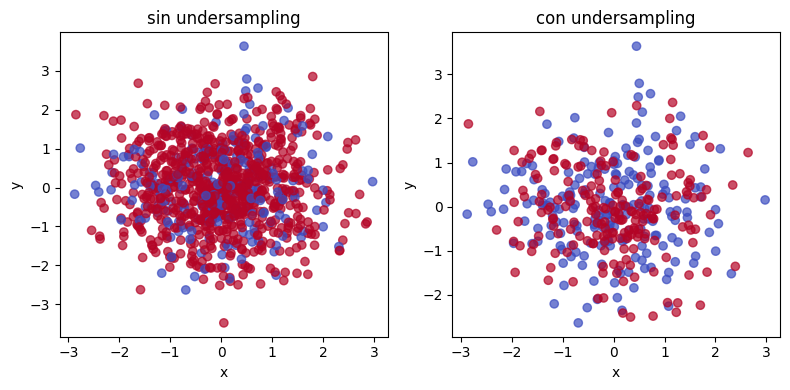

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, weights=[0.20, 0.80], random_state=64)
rus = RandomUnderSampler(sampling_strategy="auto", random_state=64)
X_resampled, y_resampled = rus.fit_resample(X, y)

compare_samplings(X, y, X_resampled, y_resampled, undersampling=True)

El oversampling es algo un poco más complejo, ya que implica generar registros artificiales. Existen varios algoritmos para llevar esto a cabo. Los más populares son SMOTE y ADASYN.

tamaño de X antes de hacer oversampling: 1000
tamaño de X después de hacer oversampling: 1594
(array([0, 1]), array([797, 797]))


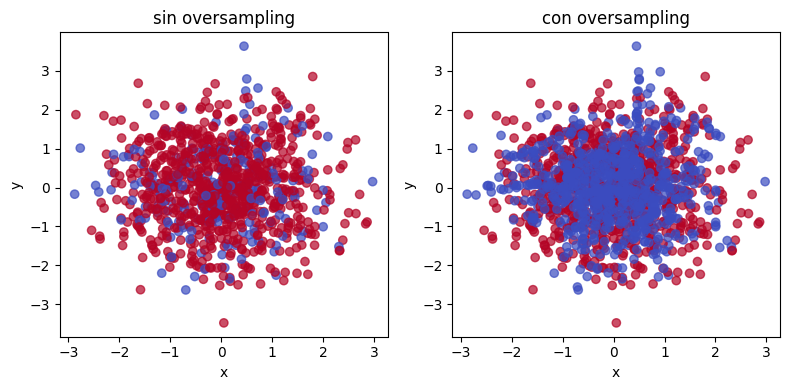

In [26]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
compare_samplings(X, y, X_resampled, y_resampled, undersampling=False)